# KNN Classifier for penguins

The following exercise aims to apply a KNN classifier to distinguish different species of penguins based on the Palmer Penguins dataset imported via Seaborn. In order to better visualise the decision boundaries, 2 features were selected.

#### 1) Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


#### 2) Load data

In [2]:
# Load dataset
penguins = sns.load_dataset("penguins").dropna()

# Select two features
features = ["bill_length_mm", "bill_depth_mm"]
X = penguins[features]

# Encode species numerically
le = LabelEncoder()
y = le.fit_transform(penguins["species"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y          # important: looks at target values and makes sure that the different targets are equally represented in the groups
)

In [48]:
# loop through a range of k values and find best fit and lowest difference between train an test fit R2

df_scores = pd.DataFrame(columns=('training_score', 'test_score', 'difference'))

for k in range(1,51):
    
    pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=k))
    ])

    pipe.fit(X_train, y_train) # applies all funtkion of the pipeline

    training_score = pipe.score(X_train, y_train)
    test_score = pipe.score(X_test, y_test)
    df_scores.loc[k] = [training_score, test_score, abs(training_score-test_score)]

df_scores.head()

,training_score,test_score,difference
1,1.000000,0.97,0.030000
2,0.948498,0.97,0.021502
3,0.961373,0.97,0.008627
4,0.965665,0.98,0.014335
5,0.969957,0.96,0.009957


highest train score:  1.0 with k =  0
highest test score:  0.99 with k =  7
lowest difference:  0.0013733905579399464 with k =  23


<Axes: >

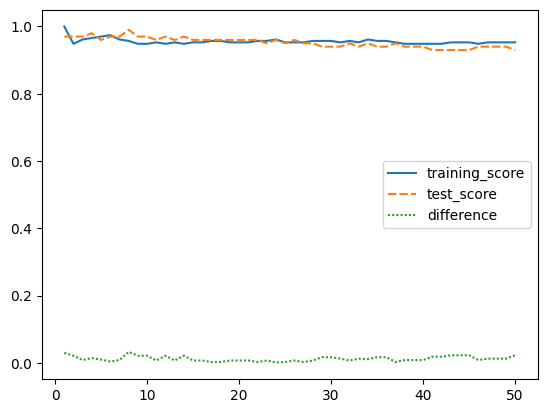

In [49]:
print("highest train score: ", df_scores["training_score"].max(), "with k = ", df_scores["training_score"].argmax())
print("highest test score: ", df_scores["test_score"].max(), "with k = ", df_scores["test_score"].argmax())
print("lowest difference: ", df_scores["difference"].min(), "with k = ", df_scores["difference"].argmin())

sns.lineplot(df_scores)

In [53]:
# define any / best k

k = 5

# pipeline: function to list all functions, useful because you make less errrors.
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=k))
])

pipe.fit(X_train, y_train) # applies all funtkion of the pipeline

print("Training accuracy:", pipe.score(X_train, y_train))
print("Test accuracy:", pipe.score(X_test, y_test))

Training accuracy: 0.9699570815450643
Test accuracy: 0.96


In [54]:
# Create mesh grid and for each point in the grid predict the class (for illustration)
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = pd.DataFrame(
    np.column_stack([xx.ravel(), yy.ravel()]),
    columns=features   # same feature names as training data
)

In [55]:
Z = pipe.predict(grid)
Z = Z.reshape(xx.shape)

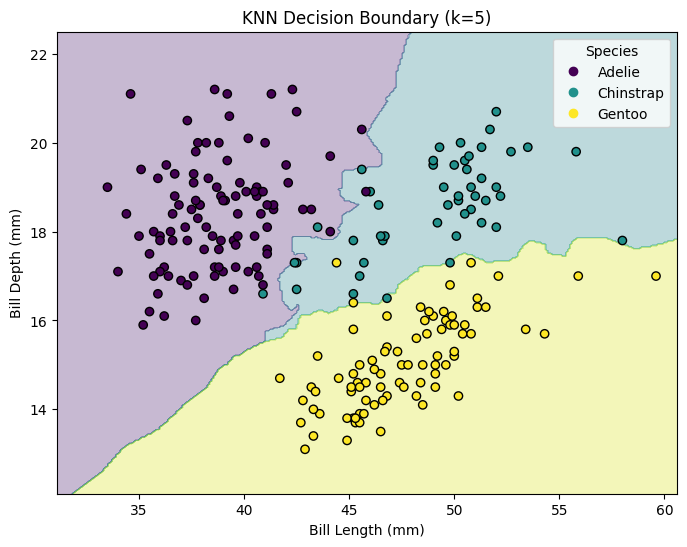

In [56]:
plt.figure(figsize=(8,6))

# Decision surface
plt.contourf(xx, yy, Z, alpha=0.3)

# Training points
scatter = plt.scatter(
    X_train.iloc[:, 0],
    X_train.iloc[:, 1],
    c=y_train,
    edgecolor="black"
)

# Legend with original species names
handles, _ = scatter.legend_elements()
plt.legend(handles, le.classes_, title="Species")

plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.title(f"KNN Decision Boundary (k={k})")
plt.show()